In [77]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score
from sklearn.metrics import f1_score as calculate_f1
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold


In [21]:
current_directory = os.getcwd()


In [22]:

print(current_directory)

C:\Users\lenovo\Downloads


In [23]:
df = pd.read_csv("diabete/diabetes_prediction_dataset.csv")

In [24]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


calculates the number of missing values in each column of a DataFrame 
It's a concise and efficient way to get an overview of missing data in a DataFrame.

In [25]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Calculates the mode for each column of DataFrame 'df' and stores the most frequent values in modes.

In [26]:
modes = df.mode().iloc[0]
modes

gender                  Female
age                       80.0
hypertension                 0
heart_disease                0
smoking_history        No Info
bmi                      27.32
HbA1c_level                6.6
blood_glucose_level        130
diabetes                     0
Name: 0, dtype: object

 Generates descriptive statistics for numerical columns in DataFrame 'df' using the describe() function.
The include parameter is set to (np.number) to include only columns of numeric data type. This provides summary statistics such as count, mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum.

In [27]:
df.describe(include=(np.number))

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [81]:
df.describe(include=[object])

<Axes: >

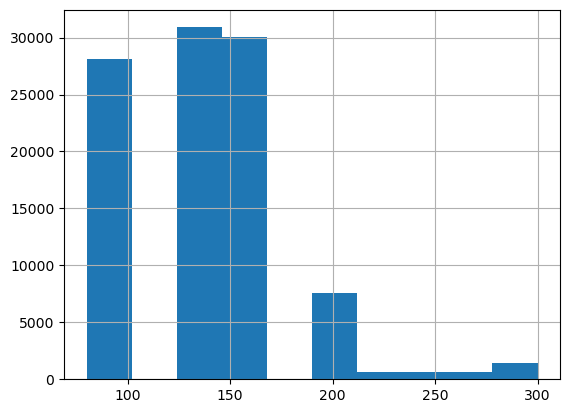

In [28]:
df['blood_glucose_level'].hist()

This code calculates the correlation matrix of a DataFrame and displays it as a heatmap with annotations. It provides a visual representation of the numerical correlation between features.

In [29]:
correlation_matrix = df.corr()

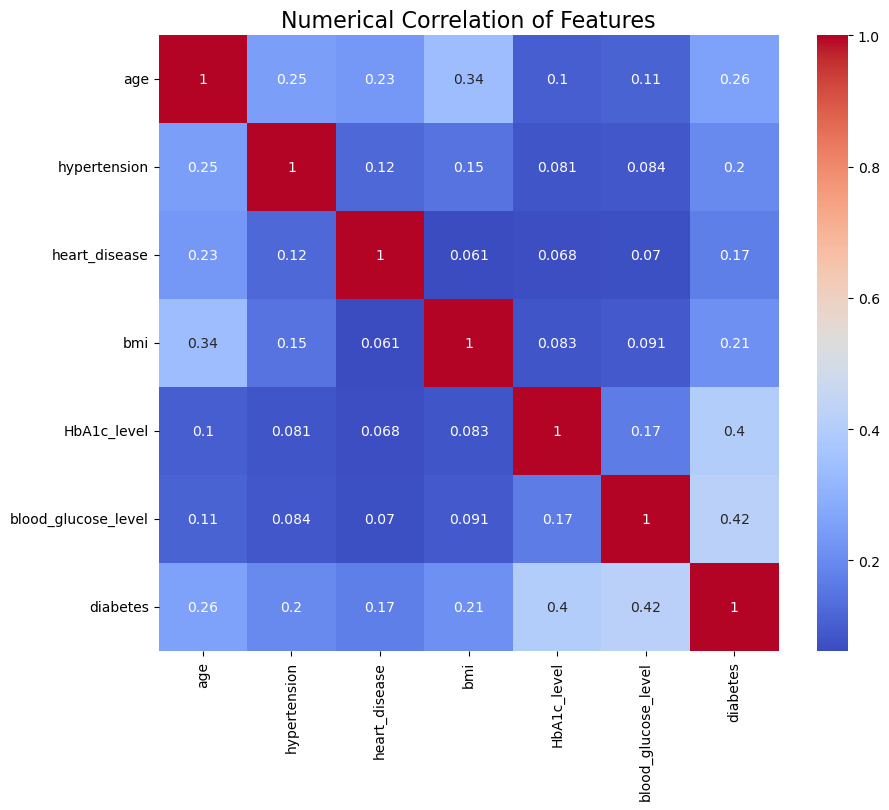

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Numerical Correlation of Features', fontsize=16)
plt.show()

First, it applies the natural logarithm transformation (np.log1p()) to the 'blood_glucose_level' column.
Second, it converts the 'gender' and 'smoking_history' columns into a categorical data type.


In [31]:
def proc_data(df):
    
    df['blood_glucose_level'] = np.log1p(df['blood_glucose_level'])
    df['gender'] = pd.Categorical(df.gender)
    df['smoking_history'] = pd.Categorical(df.smoking_history)
   



In [32]:
proc_data(df)

In [33]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,4.948760,0
1,Female,54.0,0,0,No Info,27.32,6.6,4.394449,0
2,Male,28.0,0,0,never,27.32,5.7,5.068904,0
3,Female,36.0,0,0,current,23.45,5.0,5.049856,0
4,Male,76.0,1,1,current,20.14,4.8,5.049856,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,4.510860,0
99996,Female,2.0,0,0,No Info,17.37,6.5,4.615121,0
99997,Male,66.0,0,0,former,27.83,5.7,5.049856,0
99998,Female,24.0,0,0,never,35.42,4.0,4.615121,0


In [34]:
cats=["gender","smoking_history"]
dep="diabetes"

In [35]:
df.gender.head()

0    Female
1    Female
2      Male
3    Female
4      Male
Name: gender, dtype: category
Categories (3, object): ['Female', 'Male', 'Other']

In [36]:
df.gender.cat.codes.head()

0    0
1    0
2    1
3    0
4    1
dtype: int8

<Axes: >

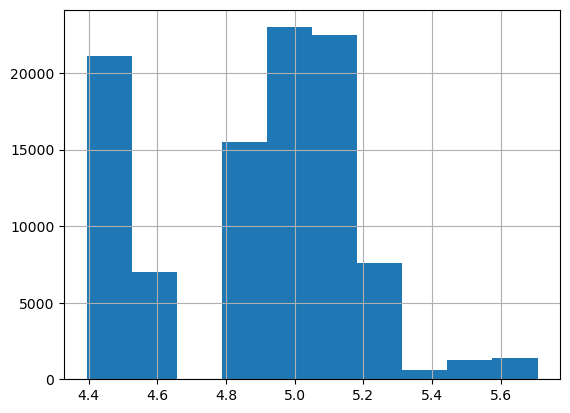

In [37]:
df['blood_glucose_level'].hist()

visualize the distribution of label values and provides insights into the count of each value.
Based on this distribution, we can have different approaches to train the model.
When we are facing an imbalanced dataset, we can overcome this problem at different levels:
1) data Level (ROS, RUS)
2) algorithm level (Ensamble)
3) metrics (F1)



Text(0.5, 1.0, 'Distribution of Labels')

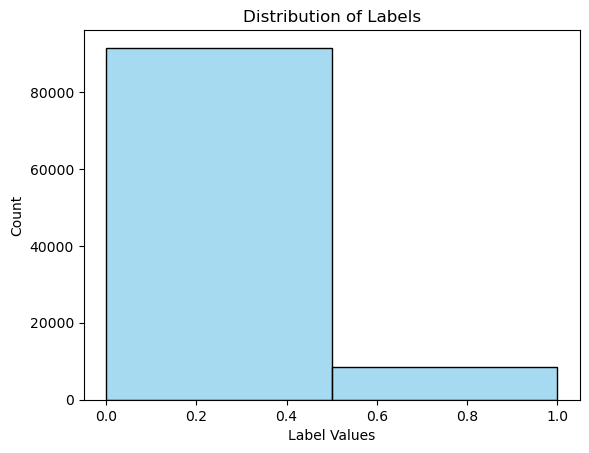

In [39]:
sns.histplot(df['diabetes'], color='skyblue', bins=2)
plt.xlabel('Label Values')
plt.ylabel('Count')
plt.title('Distribution of Labels')

In [40]:
df.dtypes

gender                 category
age                     float64
hypertension              int64
heart_disease             int64
smoking_history        category
bmi                     float64
HbA1c_level             float64
blood_glucose_level     float64
diabetes                  int64
dtype: object

In [41]:
indep = df.iloc[:, :-1]
dep = df.iloc[:, -1]

In [42]:
indep.dtypes

gender                 category
age                     float64
hypertension              int64
heart_disease             int64
smoking_history        category
bmi                     float64
HbA1c_level             float64
blood_glucose_level     float64
dtype: object

In [43]:
dep

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64

splits the independent (input) data 'indep' and dependent (output) data 'dep' into training and validation sets.

In [44]:
X_train, X_val, y_train, y_val = train_test_split(indep, dep, test_size=0.2, random_state=42)

In [45]:
X_train.dtypes

gender                 category
age                     float64
hypertension              int64
heart_disease             int64
smoking_history        category
bmi                     float64
HbA1c_level             float64
blood_glucose_level     float64
dtype: object

 converts categorical variables in 'X_train' and 'X_val' to their corresponding numerical codes using the apply method with a lambda function

In [46]:
X_train[cats] = X_train[cats].apply(lambda x: x.cat.codes)
X_val[cats] = X_val[cats].apply(lambda x: x.cat.codes)

In [47]:
X_train

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
75220,1,73.0,0,0,3,24.77,3.5,4.394449
48955,1,80.0,0,0,4,24.60,5.7,4.983607
44966,0,38.0,0,0,2,24.33,4.0,5.068904
13568,0,26.0,0,0,5,18.87,5.0,4.615121
92727,0,61.0,1,0,1,22.11,4.5,4.454347
...,...,...,...,...,...,...,...,...
6265,1,49.0,0,0,4,32.98,5.7,4.394449
54886,0,15.0,0,0,4,28.10,5.0,5.075174
76820,1,42.0,0,0,4,26.14,5.8,4.454347
860,0,37.0,0,0,4,24.96,6.2,5.068904


In [52]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": GradientBoostingClassifier()
}

In [56]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    f1 = calculate_f1(y_val, y_pred)
    results[name] = f1

<!-- results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    results[name] = rmse -->


In [62]:
# Select the best model
best_model = min(results, key=results.get)

# Print the results
print("F1 Results:")
for name, f1_cs in results.items():
    print(f"{name}: {f1_cs:.4f}")

print("\nBest Model:", best_model)

F1 Results:
Decision Tree: 0.7242
Random Forest: 0.7969
XGBoost: 0.8097

Best Model: Decision Tree


In [58]:
param_grid = {
    'n_estimators': [20, 40, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

In [59]:
rf = models['Random Forest']

In [61]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring= "f1")
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [20, 40, 100]},
             scoring='f1')

In [63]:
best_params = grid_search.best_params_
best_score = abs(grid_search.best_score_)
print("Best Hyperparameters:", best_params)
print("Best RMSE Score:", best_score)

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 40}
Best RMSE Score: 0.8024970808589516


In [64]:
grid_results = pd.DataFrame(grid_search.cv_results_)

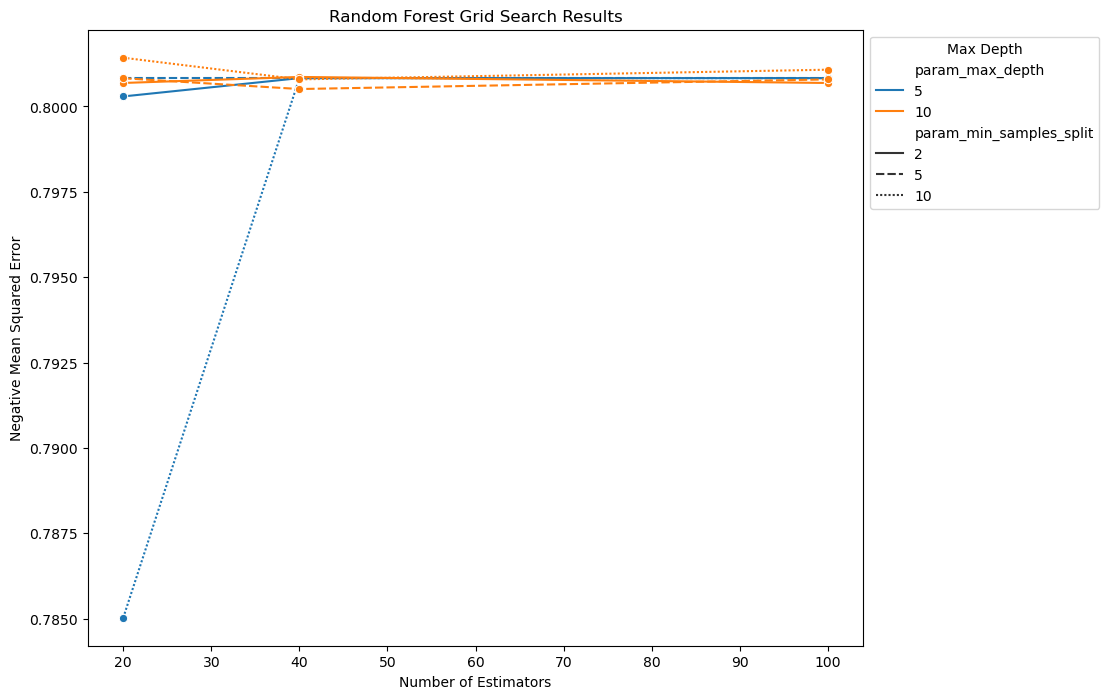

In [65]:
plt.figure(figsize=(10, 8))
sns.lineplot(data=grid_results, x='param_n_estimators', y='mean_test_score', hue='param_max_depth',
             style='param_min_samples_split', marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Negative Mean Squared Error')
plt.title('Random Forest Grid Search Results')
plt.legend(title='Max Depth', bbox_to_anchor=(1, 1))
plt.show()

In [66]:
best_model = grid_search.best_estimator_

In [67]:
best_model 

RandomForestClassifier(min_samples_split=10, n_estimators=40)

In [68]:
num_folds = 5

# Create a cross-validation object
cross_validator = KFold(n_splits=num_folds)

<!-- mse_scores = -cross_val_score(best_model, X_train, y_train, cv=cross_validator, scoring='neg_mean_squared_error')

# Calculate RMSE scores
rmse_scores = np.sqrt(mse_scores)

# Print the RMSE scores for each fold
print("RMSE scores for each fold: ", rmse_scores)
 -->

cross_val_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='f1')
mean_f1 = np.mean(cross_val_scores)
print("Mean F1 Score (Cross-Validation):", mean_f1)

In [ ]:

# # Calculate and print the average RMSE across all folds
# average_rmse = rmse_scores.mean()
# print("Average RMSE: ", average_rmse)

In [71]:
y_pred = best_model.predict(X_val)

# # Calculate RMSE (although this metric is not suitable for classification tasks)
# rmse = mean_squared_error(y_val, y_pred, squared=False)
# print(f"RMSE: {rmse}")

In [75]:
cm = confusion_matrix(y_val, y_pred)
accuracy = accuracy_score(y_val, y_pred)
f1_sc = calculate_f1(y_val, y_pred)
cm = confusion_matrix(y_val, y_pred)
tn, fp, fn, tp = cm.ravel()

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"F1-score: {f1_sc}")
print("Confusion Matrix:")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

Accuracy: 0.97215
F1-score: 0.8074662979605944
Confusion Matrix:
True Negatives: 18275
False Positives: 17
False Negatives: 540
True Positives: 1168


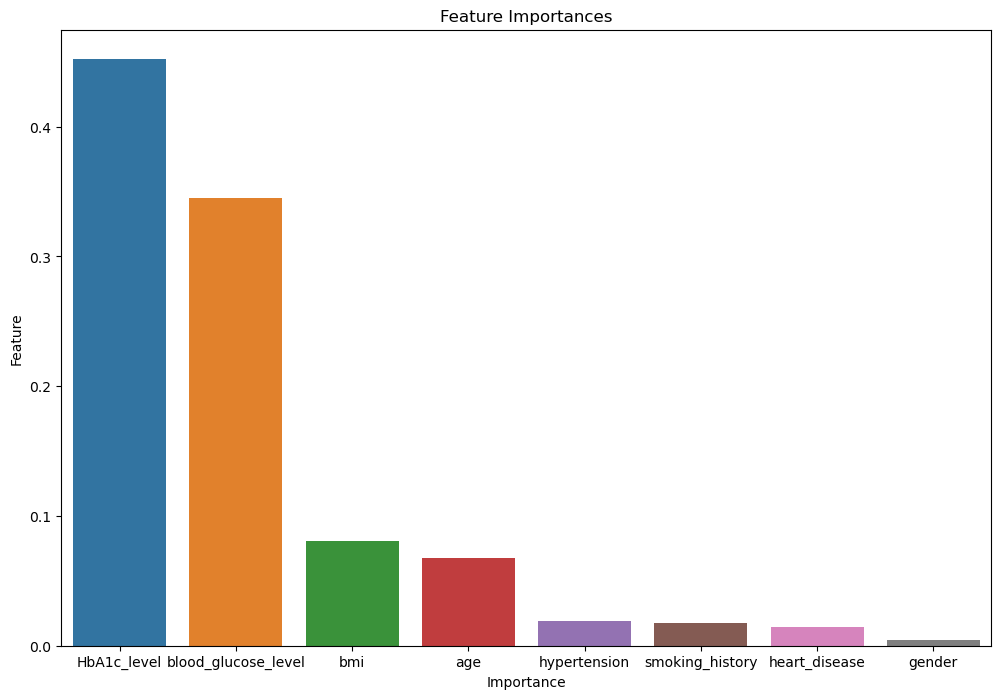

In [76]:
# Get feature importances
feature_importances = best_model.feature_importances_
feature_names = list(indep.columns)

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Importance': feature_importances, 'Feature': feature_names })
importance_df.sort_values(by='Importance', inplace=True, ascending=False)

# Plotting feature importances using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Feature', y='Importance', data=importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [78]:
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)